# Simple Linear Regression

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns 

## 1. importing dataset 

In [5]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
df.shape

(30, 2)

In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## 2. Splitting training and test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## 3. Fitting into training

In [9]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## 4. predict the result

In [11]:
y_pred = regressor.predict(X_test)

In [13]:
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [14]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [34]:
regressor.intercept_

26816.192244031183

## 5. Plot the result

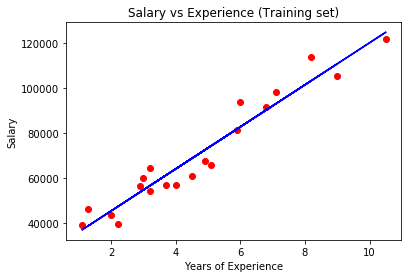

In [44]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [47]:
temp = pd.DataFrame({'Actual':y_test,'Predict':y_pred})

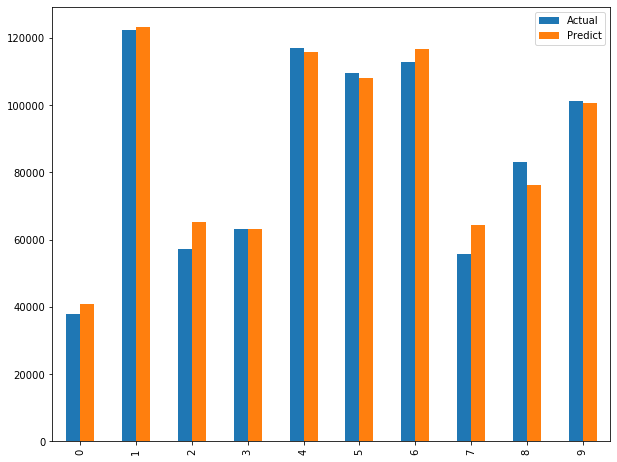

In [50]:
temp.plot(kind='bar',figsize=(10,8))
plt.show()

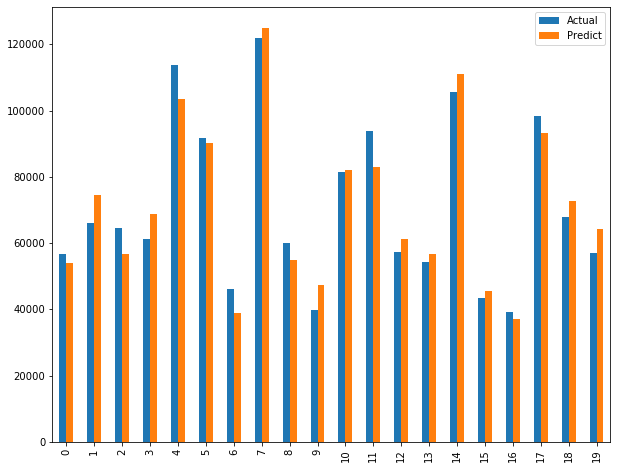

In [53]:
temp_1 = pd.DataFrame({'Actual':y_train,'Predict':regressor.predict(X_train)})
temp_1.plot(kind='bar',figsize=(10,8))
plt.show()

## 6. Evaluate Model

In [43]:
mse = 1/len(X_test) * np.sum((y_pred - y_test)**2)
mae = 1/len(X_test) * np.sum(np.abs(y_pred - y_test))
print('mse :{}'.format(mse))
print('mae :{}'.format(mae))

mse :21026037.3295113
mae :3426.4269374307078


# Multiple Linear Regression

## 1. importing dataset 

In [91]:
dataset = pd.read_csv('50_Startups.csv')

In [56]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [57]:
dataset.shape

(50, 5)

In [59]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


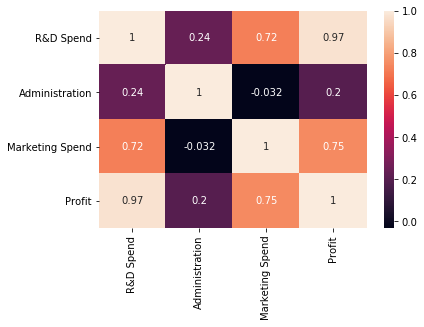

In [123]:
sns.heatmap(dataset.corr(), annot=True)

In [60]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [92]:
dataset_dummies = pd.get_dummies(dataset['State'],drop_first=True)
dataset_dummies.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [110]:
temp_3 = pd.concat([dataset_dummies,dataset], axis = 1)
temp_3.drop(['State','R&D Spend'],axis=1,inplace =True)

In [111]:
temp_3.head()

,Florida,New York,Administration,Marketing Spend,Profit
0,0,1,136897.80,471784.10,192261.83
1,0,0,151377.59,443898.53,191792.06
2,1,0,101145.55,407934.54,191050.39
3,0,1,118671.85,383199.62,182901.99
4,1,0,91391.77,366168.42,166187.94


In [112]:
X = temp_3.iloc[:, :-1].values
y = temp_3.iloc[:, -1].values

## 2. Splitting training and test set

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## 3. Fitting into training

In [115]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 4. predict the result

In [116]:
y_pred = regressor.predict(X_test)

In [117]:
regressor.intercept_

7296.179522935054

## 5. Plot the result

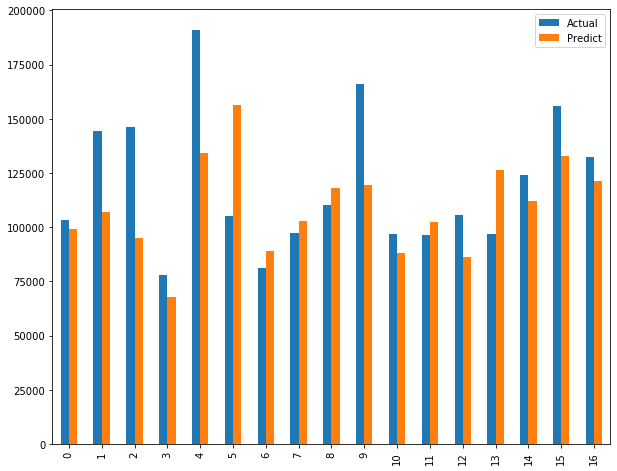

In [118]:
temp_4 = pd.DataFrame({'Actual':y_test,'Predict':y_pred})
temp_4.plot(kind='bar',figsize=(10,8))
plt.show()

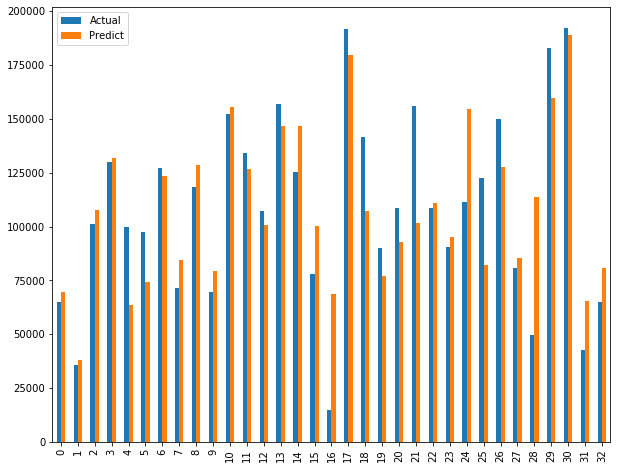

In [119]:
temp_4 = pd.DataFrame({'Actual':y_train,'Predict':regressor.predict(X_train)})
temp_4.plot(kind='bar',figsize=(10,8))
plt.show()

In [120]:
mse = 1/len(X_test) * np.sum((y_pred - y_test)**2)
mae = 1/len(X_test) * np.sum(np.abs(y_pred - y_test))
print('mse :{}'.format(mse))
print('mae :{}'.format(mae))

mse :851022249.9110005
mae :22812.996147834197


## Bonus, linear regression with statsmodel

In [121]:
import statsmodels.api as sm
from scipy import stats

In [122]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     17.83
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           7.78e-09
Time:                        23:45:00   Log-Likelihood:                -576.91
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      45   BIC:                             1173.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.903e+04   1.84e+04      1.033      0.3

In [ ]:
X = temp_3.iloc[:, :-1].values
y = temp_3.iloc[:, -1].values